In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##read the data set

In [3]:
df=pd.read_csv('insurance.csv') 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# categorical feature
#   -sex
#   -smoker
#   -region 

In [7]:
#checking for missing values 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
## data analysis 

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

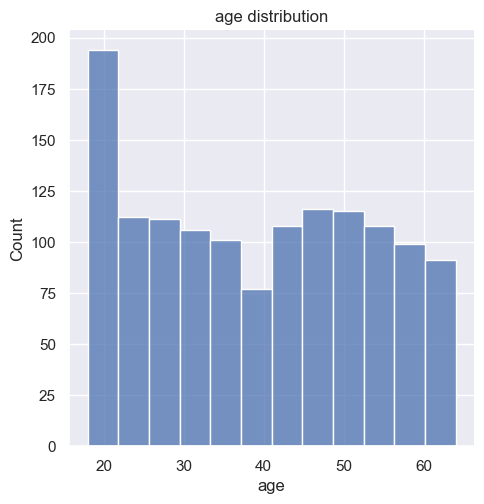

In [10]:
#distributaion of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title('age distribution')
plt.show()

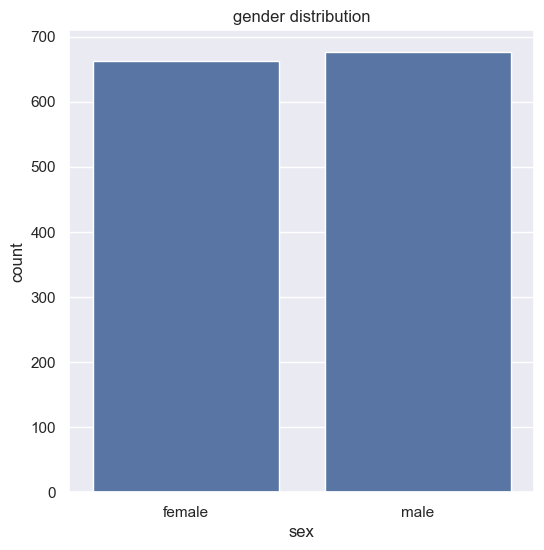

In [11]:
#distribution of gender column
plt.figure(figsize=(6,6))
sns.countplot(x=df['sex'],data=df)
plt.title('gender distribution')
plt.show()

In [12]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

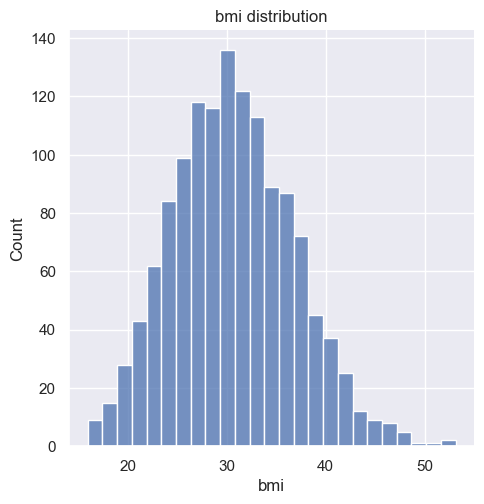

In [13]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['bmi'])
plt.title('bmi distribution')
plt.show()

In [14]:
## nomrmal bmi range 18.5 -  24.9

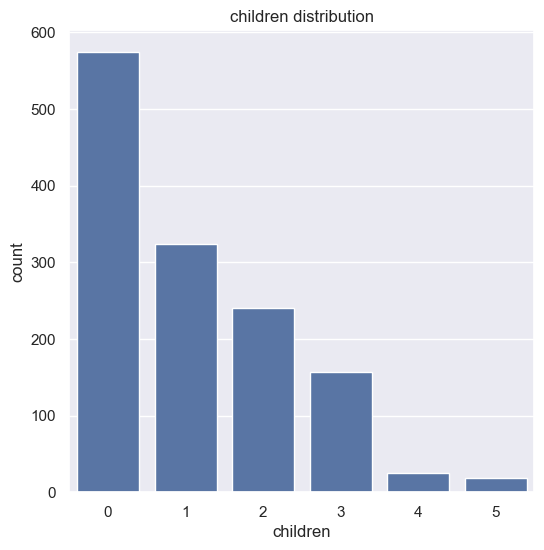

In [15]:
# plot for number of children
plt.figure(figsize=(6,6))
sns.countplot(x=df['children'],data=df)
plt.title('children distribution')
plt.show()

In [16]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

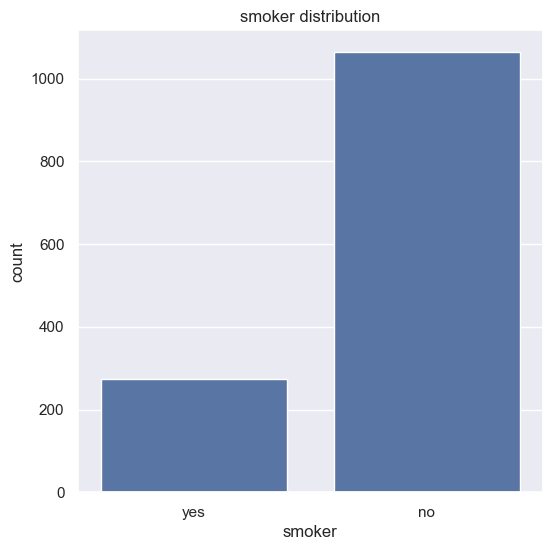

In [17]:
## smoker feature 
plt.figure(figsize=(6,6))
sns.countplot(x=df['smoker'],data=df)
plt.title('smoker distribution')
plt.show()

In [18]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

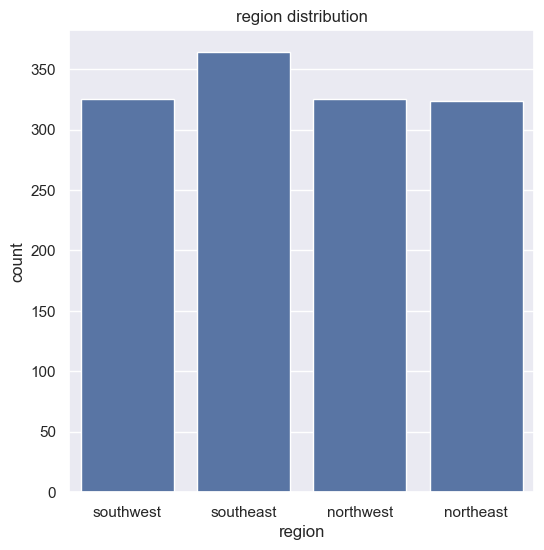

In [19]:
## region feature
plt.figure(figsize=(6,6))
sns.countplot(x=df['region'],data=df)
plt.title('region distribution')
plt.show()

In [20]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

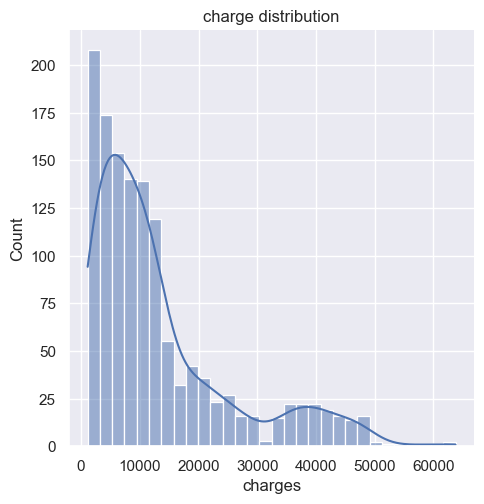

In [21]:
## charges distribution
plt.figure(figsize=(6,6))
sns.displot(x=df['charges'],data=df,kde=1)
plt.title('charge distribution')
plt.show()

In [22]:
##data preprocessing

In [23]:
#encoding sex column
df.replace( {'sex':{'male':0,'female':1}},inplace=True)

#encoding smoker value
df.replace( {'smoker':{'yes':0 ,'no':1}},inplace=True)

#encoding region value
df.replace( {'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

df.head()

C:\conda_tmp\ipykernel_24232\711914167.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace( {'sex':{'male':0,'female':1}},inplace=True)
C:\conda_tmp\ipykernel_24232\711914167.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace( {'smoker':{'yes':0 ,'no':1}},inplace=True)
C:\conda_tmp\ipykernel_24232\711914167.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to t

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [24]:
#spliting the feature abd target
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [25]:
#splitting the training data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
## implementing linear regression
from sklearn.linear_model import LinearRegression 
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [27]:
#prediction
y_train_pred=regression.predict(x_train)
y_test_pred=regression.predict(x_test)

In [28]:
##r square value
from sklearn.metrics import r2_score
print(r2_score(y_train,y_train_pred))

print(r2_score(y_test,y_test_pred) )

0.751505643411174
0.7447273869684077


In [29]:
## predict the model
value=[[57,1,31.825,0,1,3]]
regression.predict(value)

c:\Users\DEV KUMAR\anaconda3\envs\pytorchenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12945.26420028])

In [ ]:
##save file in pickle format 
import pickle
with open("linear_model.pkl", "wb") as file:
    pickle.dump(regression, file)